In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10, fashion_mnist
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


C:\Users\fkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8579 - loss: 0.4635 - val_accuracy: 0.9011 - val_loss: 0.3504
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9360 - loss: 0.2977 - val_accuracy: 0.9451 - val_loss: 0.2552
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9579 - loss: 0.2033 - val_accuracy: 0.9560 - val_loss: 0.2099
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9468 - loss: 0.1806 - val_accuracy: 0.9670 - val_loss: 0.1831
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9470 - loss: 0.1608 - val_accuracy: 0.9670 - val_loss: 0.1649
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9582 - loss: 0.1282 - val_accuracy: 0.9560 - val_loss: 0.1532
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9665 - loss: 0.1425 - val_accuracy: 0.9560 - val_loss: 0.1438
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9717 - loss: 0.1057 - val_accuracy: 0.9560 - v

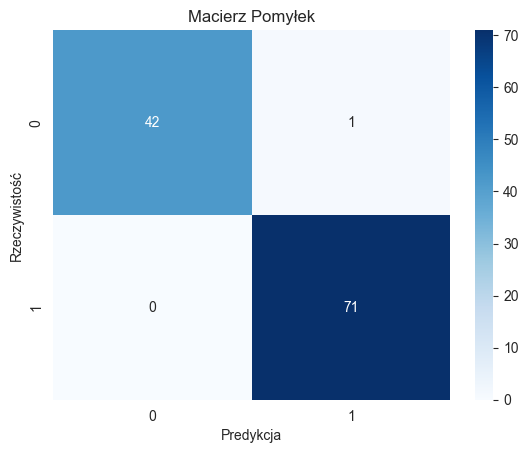

In [3]:
# DANE
data = load_breast_cancer()
X = data.data
y = data.target

# PODZIAŁ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZACJA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODEL
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TRENING
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# EWALUACJA
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# PREDYKCJA I MACIERZ POMYŁEK
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Macierz Pomyłek")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywistość")
plt.show()

Epoch 1/30


C:\Users\fkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3909 - loss: 1.0782 - val_accuracy: 0.7083 - val_loss: 0.8871
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6911 - loss: 0.9107 - val_accuracy: 0.6667 - val_loss: 0.8042
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6616 - loss: 0.8346 - val_accuracy: 0.6667 - val_loss: 0.7362
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6901 - loss: 0.7453 - val_accuracy: 0.6667 - val_loss: 0.6780
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7219 - loss: 0.6593 - val_accuracy: 0.7083 - val_loss: 0.6274
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6638 - loss: 0.6895 - val_accuracy: 0.8333 - val_loss: 0.5878
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7409 - loss: 0.6249 - val_accuracy: 0.8333 - val_loss: 0.5530
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7692 - loss: 0.5653 - val_accuracy: 0.8750 - val_loss: 0.

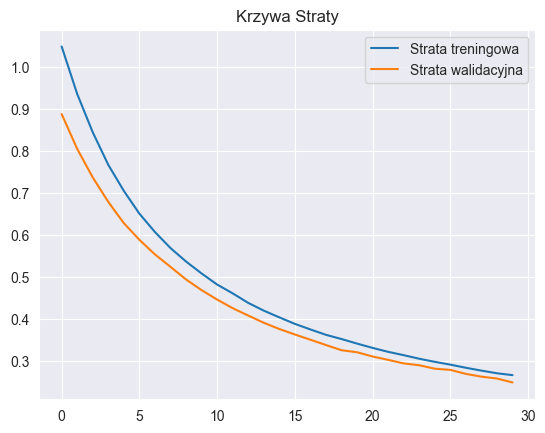

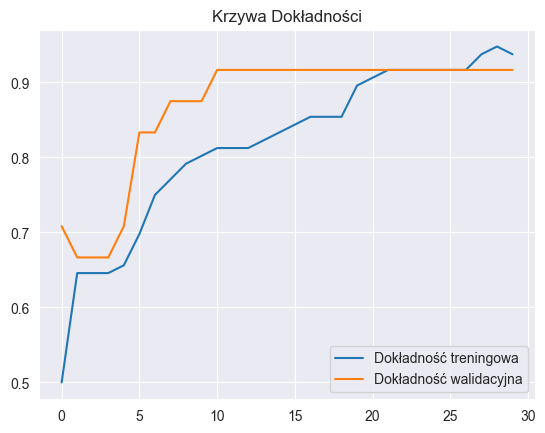

In [4]:
# DANE
iris = load_iris()
X = iris.data
y = to_categorical(iris.target)

# PODZIAŁ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZACJA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODEL
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TRENING
history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_split=0.2)

# KRZYWE UCZENIA
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.legend()
plt.title("Krzywa Straty")
plt.show()

plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.legend()
plt.title("Krzywa Dokładności")
plt.show()

In [5]:
# SYMULACJA PRZYKŁADOWYCH DANYCH
# Uwaga: aby to działało z VGGFace, musisz mieć dostęp do bazy — tutaj używamy placeholdera (np. folder 'faces')

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'faces', target_size=(224, 224), batch_size=16, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(
    'faces', target_size=(224, 224), batch_size=16, class_mode='categorical', subset='validation')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# DODANIE WARSTW
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ZAMROŻENIE WARSTW VGG
for layer in base_model.layers:
    layer.trainable = False

# KOMPILACJA I TRENING
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=5)

# EWALUACJA
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz Pomyłek')
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.show()


FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'faces'

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


C:\Users\fkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2502 - loss: 2.0770
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3617 - loss: 1.7946
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3846 - loss: 1.7386
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3979 - loss: 1.6984
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4086 - loss: 1.6684
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


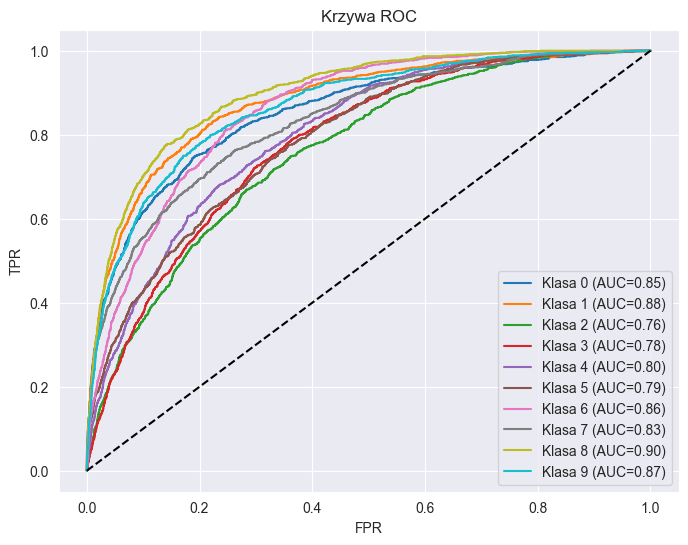

In [6]:
# DANE
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# MODEL
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# ROC
y_pred = model.predict(x_test)
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# WYKRES
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Klasa {i} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Krzywa ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

Epoch 1/5


C:\Users\fkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - iou_metric: 0.2855 - loss: 0.6971
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - iou_metric: 0.3799 - loss: 0.6938
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - iou_metric: 0.2675 - loss: 0.6935
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - iou_metric: 0.2728 - loss: 0.6933
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - iou_metric: 0.3327 - loss: 0.6933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


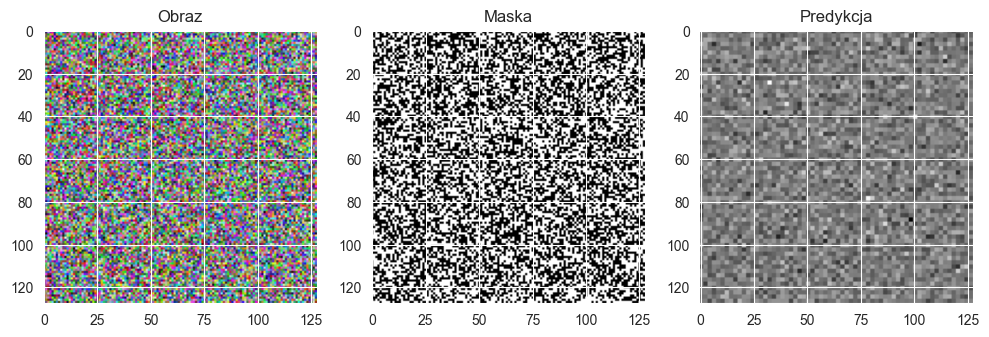

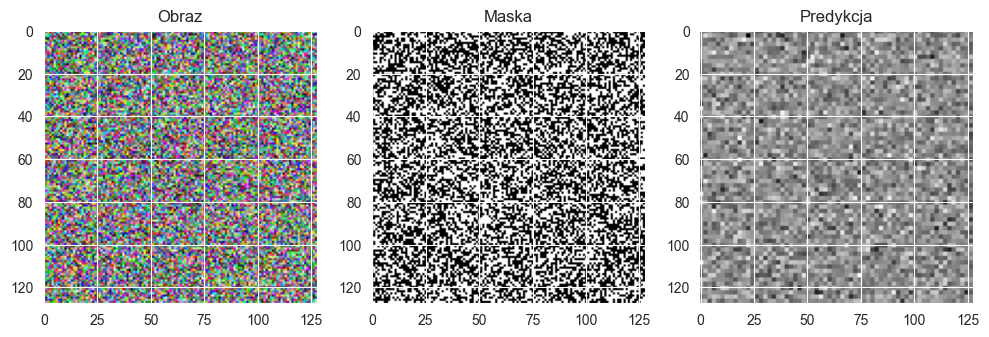

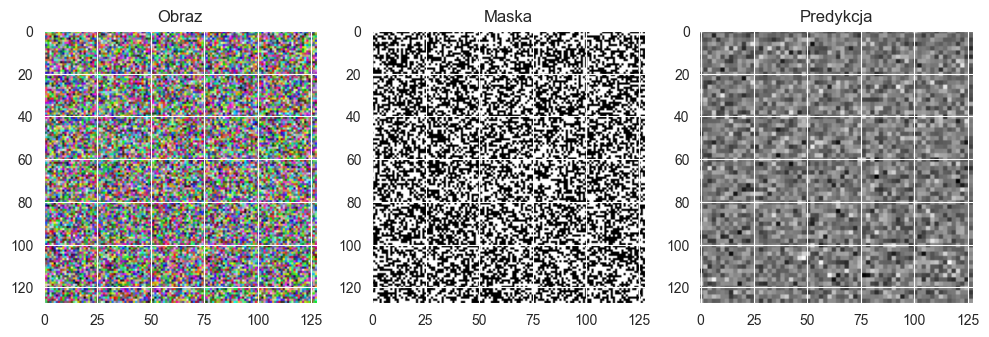

In [7]:

# PRZYKŁADOWE DANE (losowe obrazy + maski)
X = np.random.rand(100, 128, 128, 3)
y = np.random.randint(0, 2, size=(100, 128, 128, 1))

# MODEL UNet-podobny
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (1, 1), activation='sigmoid')
])

# METRYKA IoU
def iou_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true + y_pred) - intersection
    return intersection / (union + 1e-10)


# KOMPILACJA I TRENING
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[iou_metric])
model.fit(X, y, epochs=5, batch_size=8)

# PREDYKCJA I WIZUALIZACJA
pred = model.predict(X[:3])
for i in range(3):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(X[i])
    plt.title("Obraz")
    plt.subplot(1, 3, 2)
    plt.imshow(y[i].squeeze(), cmap='gray')
    plt.title("Maska")
    plt.subplot(1, 3, 3)
    plt.imshow(pred[i].squeeze(), cmap='gray')
    plt.title("Predykcja")
    plt.show()

In [4]:
# 1. Wczytanie i przygotowanie danych (symulacja klasyfikacji twarzy)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
selected_classes = [0, 1, 8]  # airplane, automobile, ship

# Filtrujemy tylko wybrane klasy
train_filter = np.isin(y_train, selected_classes).flatten()
test_filter = np.isin(y_test, selected_classes).flatten()
x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Mapa etykiet: 0, 1, 8 → 0, 1, 2
label_map = {v: i for i, v in enumerate(selected_classes)}
y_train = np.vectorize(label_map.get)(y_train)
y_test = np.vectorize(label_map.get)(y_test)

# 2. Tworzenie zbiorów danych z tf.data (przetwarzanie w locie)
def preprocess(image, label):
    label = tf.squeeze(label)
    image = tf.image.resize(image, [224, 224]) / 255.0
    return image, tf.one_hot(label, depth=3)


train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# 3. Transfer learning z VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Dodanie własnych warstw
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Kompilacja i trening
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_ds, validation_data=test_ds, epochs=5)

# 4. Ewaluacja
y_true = []
y_pred = []

for images, labels in test_ds:
    probs = model.predict(images)
    y_pred.extend(np.argmax(probs, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Raport klasyfikacji
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['airplane', 'automobile', 'ship']))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['airplane', 'automobile', 'ship'],
            yticklabels=['airplane', 'automobile', 'ship'])
plt.title('Macierz Pomyłek')
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.tight_layout()
plt.show()

Epoch 1/5
  7/469 ━━━━━━━━━━━━━━━━━━━━ 17:09 2s/step - accuracy: 0.3170 - loss: 3.7135

KeyboardInterrupt: 